<a href="https://colab.research.google.com/github/prateek-ml/first_cnn/blob/master/CNN_on_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# set tf 1.x for colab
%tensorflow_version 1.x

TensorFlow 1.x selected.


# First CNN on CIFAR-10


CIFAR-10 dataset contains 32x32 color images from 10 classes: __airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck__:
<img src="https://github.com/hse-aml/intro-to-dl/blob/master/week3/images/cifar10.jpg?raw=1" style="width:80%">

# Importing stuff

In [2]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

1.15.2
2.3.1


Using TensorFlow backend.


# Loading dataset

In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [5]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

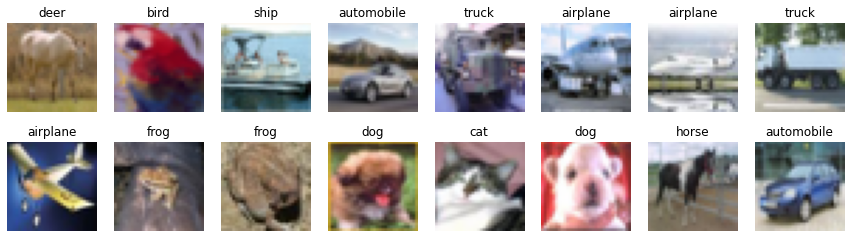

In [6]:
# Displaying random images from training set
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

# Preparing data

We need to normalize inputs like this: $$x_{norm} = \frac{x}{255} - 0.5$$

Also, we need to convert class labels to one-hot encoded vectors.

In [7]:
# normalize inputs
x_train2 = x_train/255 - 0.5
x_test2 = x_test/255 - 0.5

# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
y_train2 = keras.utils.to_categorical(y_train, 10)
y_test2 = keras.utils.to_categorical(y_test, 10)

# Define CNN architecture

In [8]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

Convolutional networks are built from several types of layers:
- [Conv2D](https://keras.io/layers/convolutional/#conv2d) - performs convolution:
    - **filters**: number of output channels; 
    - **kernel_size**: an integer or tuple/list of 2 integers, specifying the width and height of the 2D convolution window;
    - **padding**: padding="same" adds zero padding to the input, so that the output has the same width and height, padding='valid' performs convolution only in locations where kernel and the input fully overlap;
    - **activation**: "relu", "tanh", etc.
    - **input_shape**: shape of input.
- [MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d) - performs 2D max pooling.
- [Flatten](https://keras.io/layers/core/#flatten) - flattens the input, does not affect the batch size.
- [Dense](https://keras.io/layers/core/#dense) - fully-connected layer.
- [Activation](https://keras.io/layers/core/#activation) - applies an activation function.
- [LeakyReLU](https://keras.io/layers/advanced-activations/#leakyrelu) - applies leaky relu activation.
- [Dropout](https://keras.io/layers/core/#dropout) - applies dropout.

Now is the time we define our first CNN model architecture.
This model will consist of :
Con-Conv-Pool--Conv-Conv-Pool--Conv-Conv-Pool--FC(256)-FC(128)-FC(10)

This model will contain 4 convolutional layers followed by MaxPooling layer.
After the pooling layer, Dropout is added.

This sequence repeats 2 more times and then we add the fully-connected Dense layers.

We will apply the LeakyReLU activation after the convolutional and Dense layers.
'Same' padding used in the convolutional layers.

In [9]:
def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """
    model = Sequential()

    ### YOUR CODE HERE
    model.add(Conv2D(16, (3,3), padding='same', input_shape=(32,32,3)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32, (3,3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D((2,2), padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, (3,3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32, (3,3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D((2,2), padding='same'))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D((2,2), padding='same'))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    
    return model

In [10]:
# describe model
model = make_model()
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
______________________________________

# Training model

Training of your model can take approx. 4-8 minutes per epoch.

During training you should observe the decrease in reported loss on training and validation.

If the loss on training is not decreasing with epochs you should revise your model definition and learning rate.

In [11]:
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 32
EPOCHS = 10


model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=keras.optimizers.adamax(lr=INIT_LR),  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

# scheduler of learning rate (decay with epochs)
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

# callback for printing of actual learning rate used by optimizer
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

In [12]:
# We will save model checkpoints to continue training in case of kernel death
last_saved_epoch = None 

In [ ]:
# fit model
model.fit(
    x_train2, y_train2,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler),
               keras.callbacks.TensorBoard(log_dir='./logs'),
               LrHistory(),
               keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5')],          
    validation_data=(x_test2, y_test2),
    shuffle=True,
)


Train on 50000 samples, validate on 10000 samples


Epoch 1/10
Learning rate: 0.005
50000/50000 [==============================] - 25s 491us/step - loss: 1.6758 - accuracy: 0.3723 - val_loss: 1.2384 - val_accuracy: 0.5552

Epoch 2/10
Learning rate: 0.0045
50000/50000 [==============================] - 21s 422us/step - loss: 1.2276 - accuracy: 0.5671 - val_loss: 1.0375 - val_accuracy: 0.6318
Epoch 3/10
Learning rate: 0.00405
50000/50000 [==============================] - 21s 423us/step - loss: 1.0793 - accuracy: 0.6245 - val_loss: 0.9233 - val_accuracy: 0.6756
Epoch 4/10
Learning rate: 0.003645
50000/50000 [==============================] - 21s 422us/step - loss: 0.9824 - accuracy: 0.6607 - val_loss: 0.8208 - val_accuracy: 0.7142
Epoch 5/10
Learning rate: 0.0032805
28576/50000 [================>.............] - ETA: 8s - loss: 0.9026 - accuracy: 0.6878

In [ ]:
# Saving weights to file
model.save_weights("weights.h5")

In [ ]:
# We can load the saved weights from file (can call without model.fit)
model.load_weights("weights.h5")

# Evaluating model performance

In [ ]:
# make test predictions
y_pred_test = model.predict_proba(x_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [ ]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test, y_pred_test_classes))

In [ ]:
# Inspecting some random predictions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()